In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv(r'C:\Users\A\Desktop\credit card fraud detection\NoteBook\creditcard_fraud_detection.csv')
df.head()

,TransactionAmount,TransactionTime,TransactionType,MerchantCategory,TransactionLocation,DeviceType,TransactionFrequency,SpendingPattern,CardPresent,PastFraudHistory,Velocity,DistanceFromLast,AmountRatio,AccountAge,IsFraud
0,46.93,11.0,POS,Travel,Local,Desktop,13.0,Medium,Yes,0.0,4.0,1595.7,2.30,32.0,0
1,301.01,21.0,Online,Travel,International,Desktop,17.0,Medium,No,0.0,3.0,2599.2,6.03,152.0,0
2,131.67,3.0,POS,Groceries,Local,Mobile,14.0,Medium,Yes,0.0,5.0,399.6,0.70,59.0,0
3,91.29,17.0,Online,Electronics,Domestic,Mobile,14.0,Low,Yes,0.0,2.0,2426.1,3.52,146.0,0
4,16.96,15.0,POS,Groceries,Domestic,Tablet,1.0,Medium,Yes,0.0,5.0,4622.9,0.13,224.0,0


In [62]:
df.shape

(6240, 15)

In [63]:
df.isnull().sum()

TransactionAmount        8
TransactionTime          4
TransactionType          3
MerchantCategory         5
TransactionLocation      9
DeviceType               3
TransactionFrequency     3
SpendingPattern          8
CardPresent              4
PastFraudHistory         3
Velocity                 4
DistanceFromLast        12
AmountRatio              4
AccountAge               9
IsFraud                  0
dtype: int64

In [64]:
df.dropna(inplace=True)

In [65]:
df.isnull().sum()

TransactionAmount       0
TransactionTime         0
TransactionType         0
MerchantCategory        0
TransactionLocation     0
DeviceType              0
TransactionFrequency    0
SpendingPattern         0
CardPresent             0
PastFraudHistory        0
Velocity                0
DistanceFromLast        0
AmountRatio             0
AccountAge              0
IsFraud                 0
dtype: int64

In [66]:
df.duplicated().sum()

np.int64(128)

In [67]:
df.drop_duplicates(inplace=True)

In [68]:
df.shape

(6033, 15)

In [69]:
df.duplicated().sum()

np.int64(0)

In [70]:
df.info()

<class 'pandas.DataFrame'>
Index: 6033 entries, 0 to 6239
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionAmount     6033 non-null   float64
 1   TransactionTime       6033 non-null   float64
 2   TransactionType       6033 non-null   str    
 3   MerchantCategory      6033 non-null   str    
 4   TransactionLocation   6033 non-null   str    
 5   DeviceType            6033 non-null   str    
 6   TransactionFrequency  6033 non-null   float64
 7   SpendingPattern       6033 non-null   str    
 8   CardPresent           6033 non-null   str    
 9   PastFraudHistory      6033 non-null   float64
 10  Velocity              6033 non-null   float64
 11  DistanceFromLast      6033 non-null   float64
 12  AmountRatio           6033 non-null   float64
 13  AccountAge            6033 non-null   float64
 14  IsFraud               6033 non-null   int64  
dtypes: float64(8), int64(1), str(6)
memor

In [71]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionAmount,6033.0,NaN,NaN,NaN,122.958028,143.54416,0.0,31.52,78.66,161.72,1467.975
TransactionTime,6033.0,NaN,NaN,NaN,11.539698,6.893019,0.0,6.0,12.0,17.0,23.0
TransactionType,6033,3,POS,3006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MerchantCategory,6033,6,Groceries,1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionLocation,6033,3,Local,3621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceType,6033,4,Mobile,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TransactionFrequency,6033.0,NaN,NaN,NaN,12.125725,9.045259,1.0,6.0,11.0,16.0,47.5
SpendingPattern,6033,3,Low,3077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CardPresent,6033,2,Yes,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PastFraudHistory,6033.0,NaN,NaN,NaN,0.189955,0.392298,0.0,0.0,0.0,0.0,1.0


In [72]:
for i in range(len(df.columns)):
  feature=df.columns[i]
  if df[feature].dtype == 'str':
    print(f'{feature} has {df[feature].nunique()} unique values----> {df[feature].unique()}')
    print()

TransactionType has 3 unique values----> <StringArray>
['POS', 'Online', 'ATM']
Length: 3, dtype: str

MerchantCategory has 6 unique values----> <StringArray>
['Travel', 'Groceries', 'Electronics', 'Clothing', 'Others', 'Luxury']
Length: 6, dtype: str

TransactionLocation has 3 unique values----> <StringArray>
['Local', 'International', 'Domestic']
Length: 3, dtype: str

DeviceType has 4 unique values----> <StringArray>
['Desktop', 'Mobile', 'Tablet', 'POS_Terminal']
Length: 4, dtype: str

SpendingPattern has 3 unique values----> <StringArray>
['Medium', 'Low', 'High']
Length: 3, dtype: str

CardPresent has 2 unique values----> <StringArray>
['Yes', 'No']
Length: 2, dtype: str



In [73]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='str']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='str']
print(f'In the dataset the numeric columns are {numeric_features}')
print()
print(f'In the dataset the categorical columns are {categorical_features}')

In the dataset the numeric columns are ['TransactionAmount', 'TransactionTime', 'TransactionFrequency', 'PastFraudHistory', 'Velocity', 'DistanceFromLast', 'AmountRatio', 'AccountAge', 'IsFraud']

In the dataset the categorical columns are ['TransactionType', 'MerchantCategory', 'TransactionLocation', 'DeviceType', 'SpendingPattern', 'CardPresent']


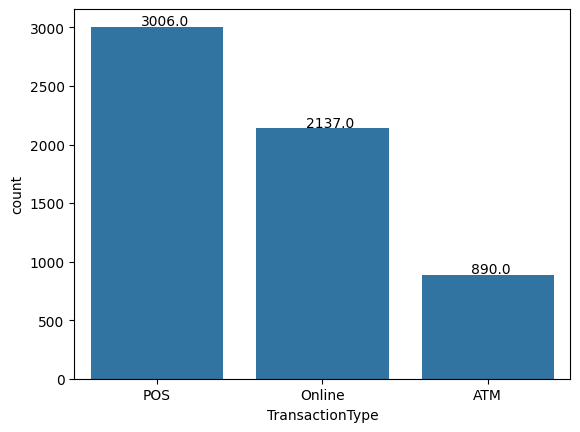

In [74]:
ax=sns.barplot(df['TransactionType'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15))
plt.show()

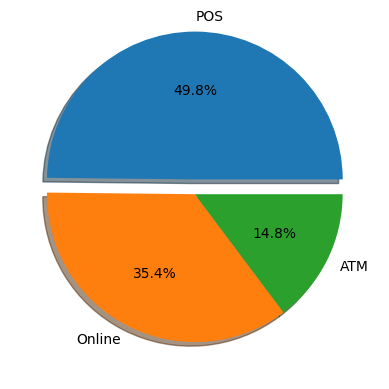

In [75]:
plt.pie(x=df['TransactionType'].value_counts(),labels=df['TransactionType'].value_counts().index,explode=[0.1,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

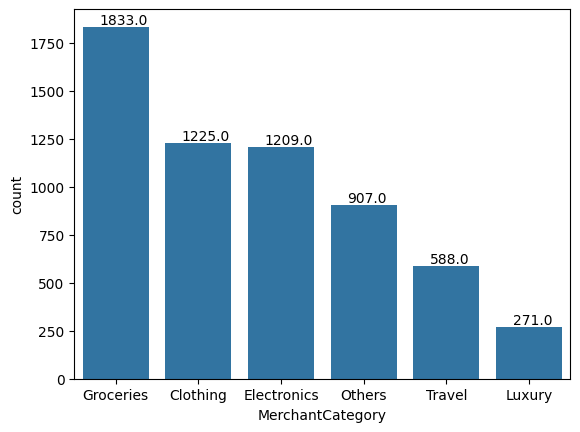

In [76]:
ax=sns.barplot(df['MerchantCategory'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.2,p.get_height()+15))
plt.show()

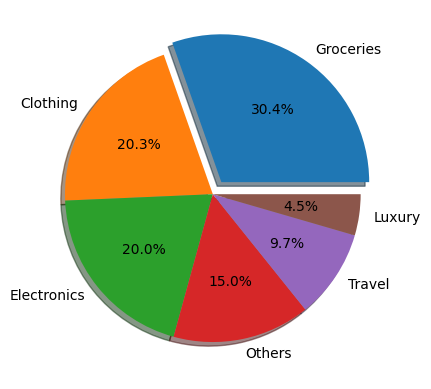

In [77]:
plt.pie(x=df['MerchantCategory'].value_counts(),labels=df['MerchantCategory'].value_counts().index,explode=[0.1,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

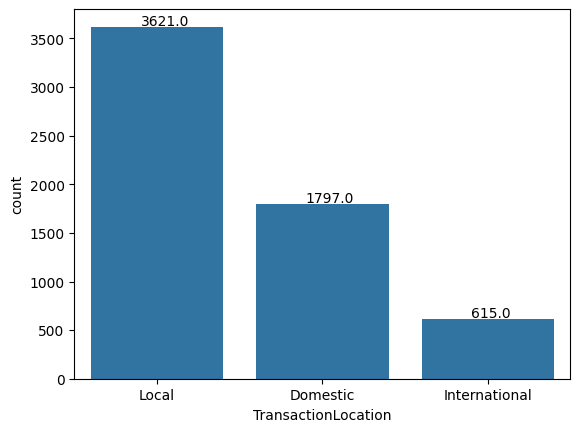

In [78]:
ax=sns.barplot(df['TransactionLocation'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15))
plt.show()

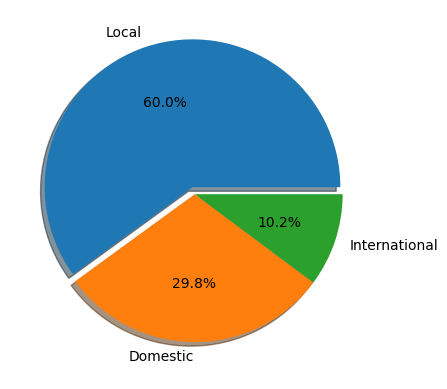

In [80]:
plt.pie(x=df['TransactionLocation'].value_counts(),labels=df['TransactionLocation'].value_counts().index,explode=[0.05,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

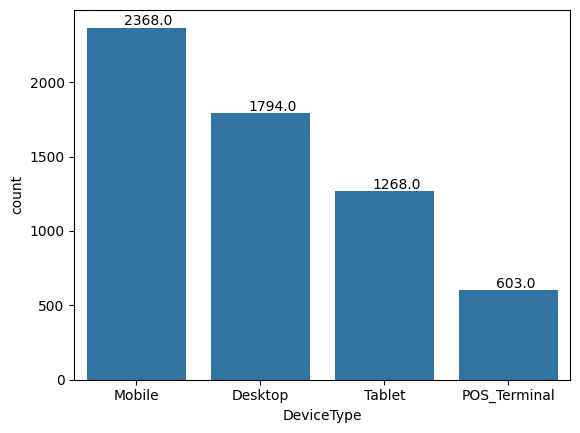

In [81]:
ax=sns.barplot(df['DeviceType'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15))
plt.show()

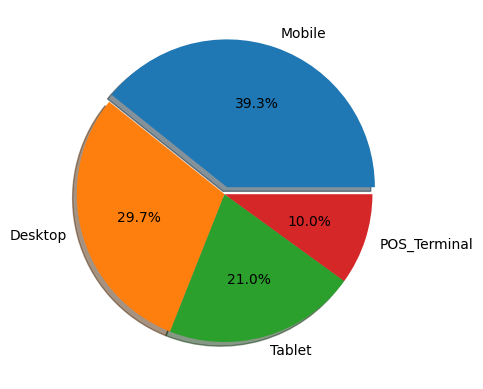

In [82]:
plt.pie(x=df['DeviceType'].value_counts(),labels=df['DeviceType'].value_counts().index,explode=[0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

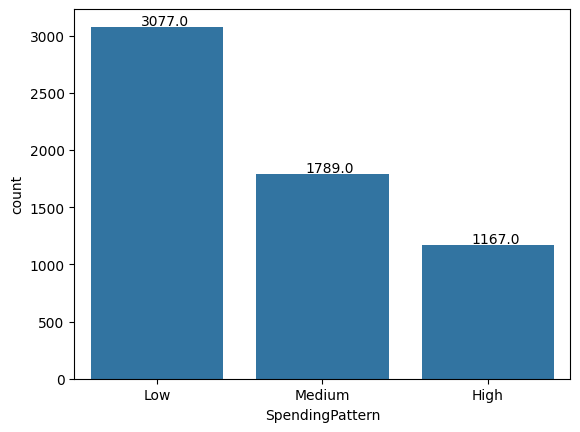

In [83]:
ax=sns.barplot(df['SpendingPattern'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15))
plt.show()

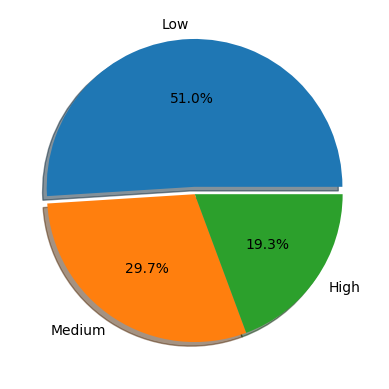

In [84]:
plt.pie(x=df['SpendingPattern'].value_counts(),labels=df['SpendingPattern'].value_counts().index,explode=[0.05,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

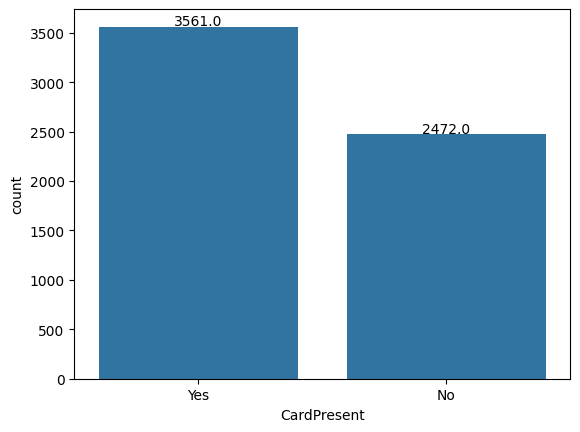

In [85]:
ax=sns.barplot(df['CardPresent'].value_counts())
for p in ax.patches:
  ax.annotate((p.get_height()),(p.get_x()+0.3,p.get_height()+15))
plt.show()

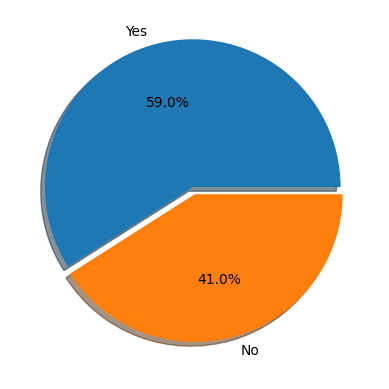

In [86]:
plt.pie(x=df['CardPresent'].value_counts(),labels=df['CardPresent'].value_counts().index,explode=[0.05,0],autopct='%1.1f%%',shadow=True)
plt.show()

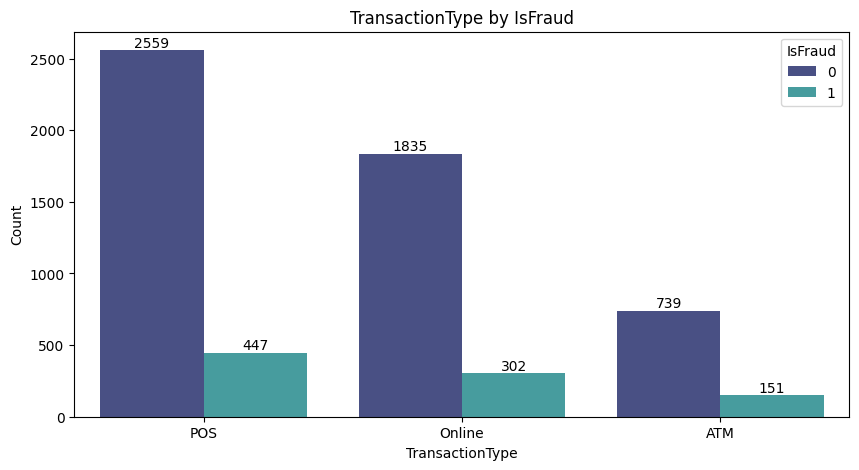

In [92]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='TransactionType', hue='IsFraud', data=df, palette='mako')
plt.title('TransactionType by IsFraud')
plt.xlabel('TransactionType')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

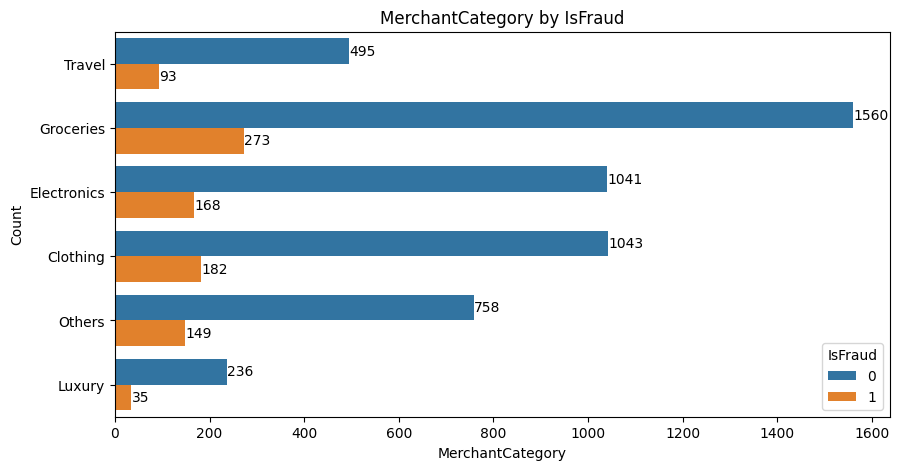

In [101]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='MerchantCategory', hue='IsFraud', data=df)
plt.title('MerchantCategory by IsFraud')
plt.xlabel('MerchantCategory')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

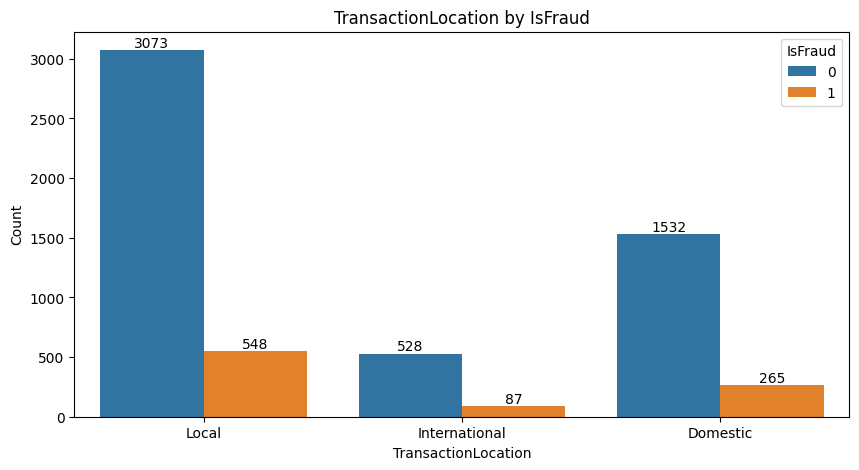

In [97]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='TransactionLocation', hue='IsFraud', data=df)
plt.title('TransactionLocation by IsFraud')
plt.xlabel('TransactionLocation')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

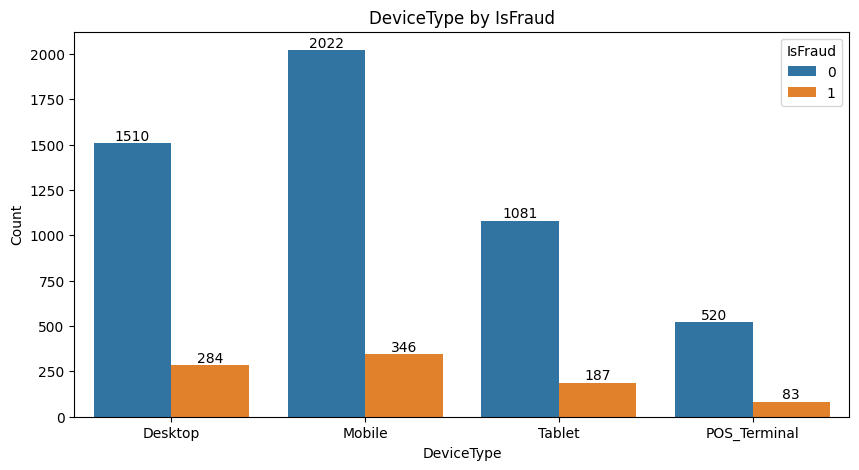

In [98]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='DeviceType', hue='IsFraud', data=df)
plt.title('DeviceType by IsFraud')
plt.xlabel('DeviceType')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

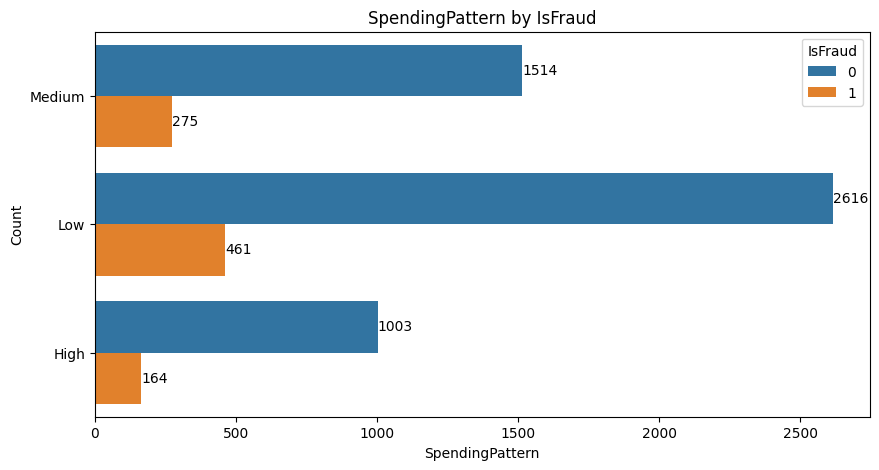

In [100]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(y='SpendingPattern', hue='IsFraud', data=df)
plt.title('SpendingPattern by IsFraud')
plt.xlabel('SpendingPattern')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

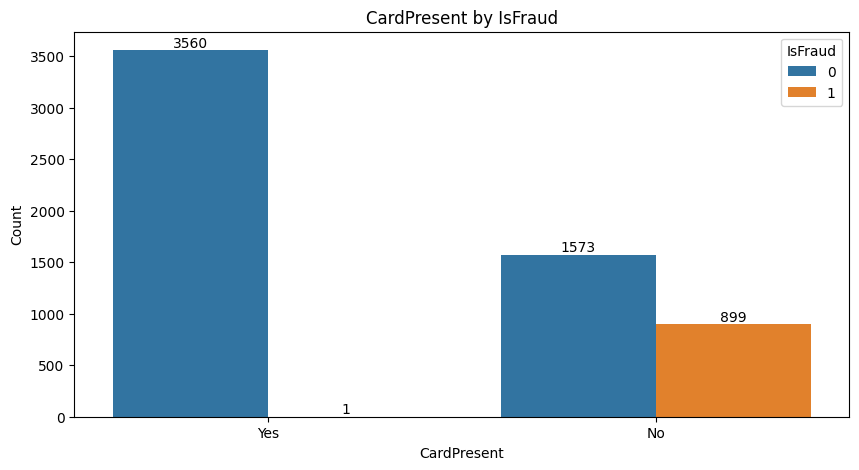

In [102]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='CardPresent', hue='IsFraud', data=df)
plt.title('CardPresent by IsFraud')
plt.xlabel('CardPresent')
plt.ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

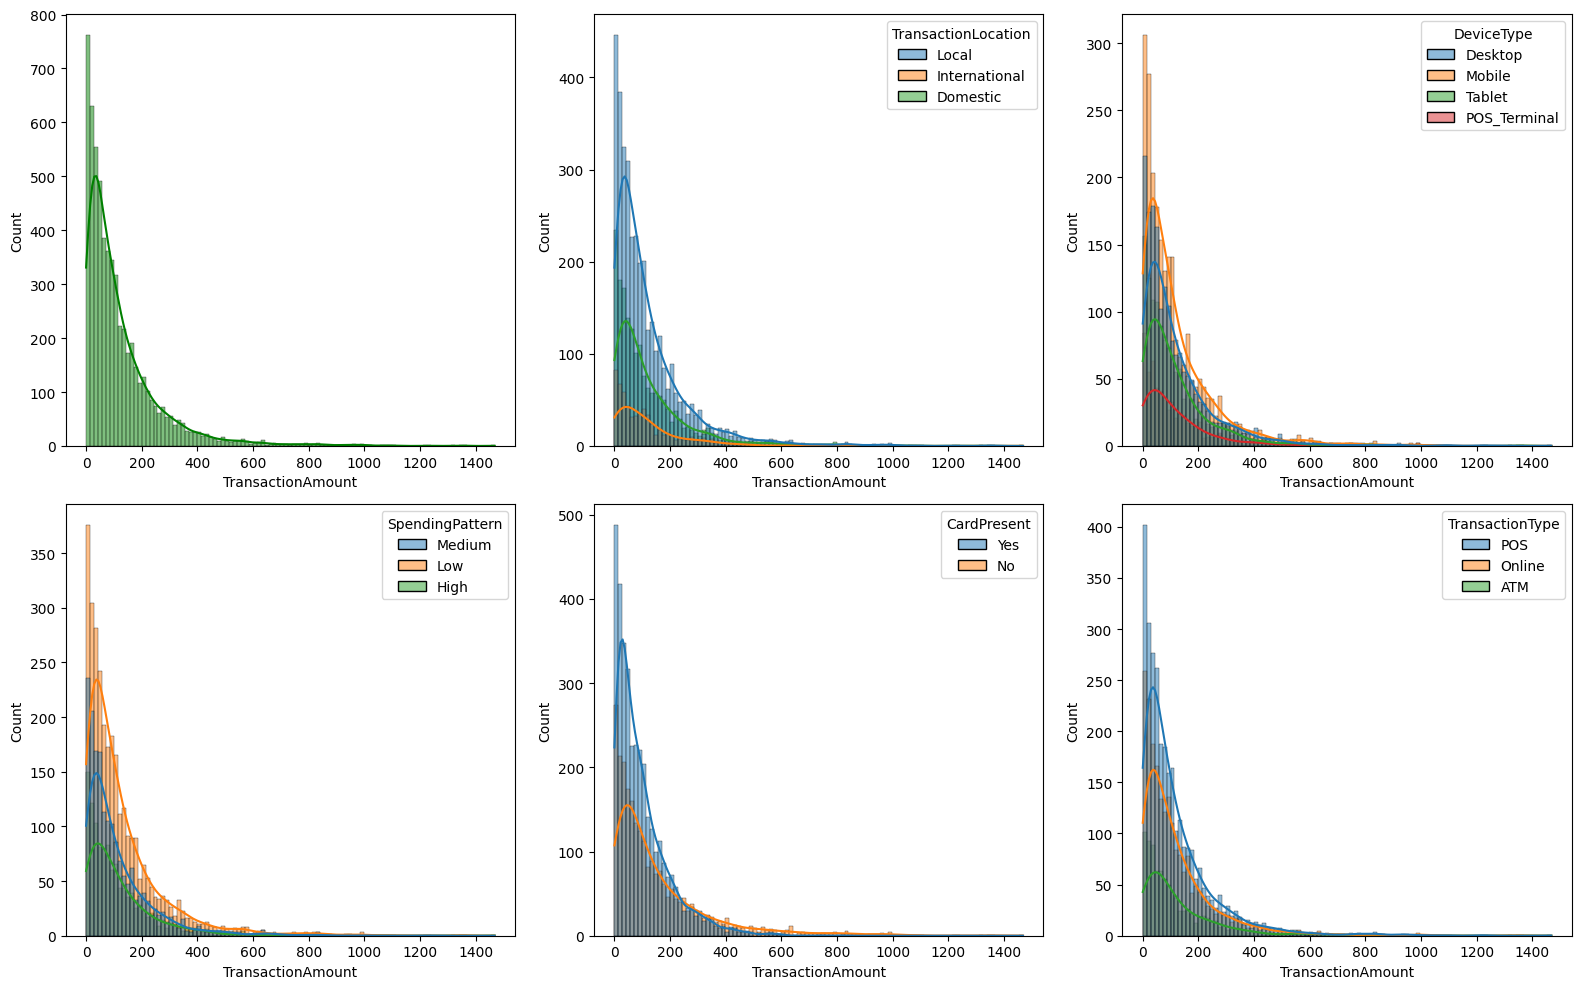

In [121]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

sns.histplot(df['TransactionAmount'], kde=True, color="g", ax=axes[0,0])
sns.histplot(data=df, x='TransactionAmount', kde=True, hue='TransactionLocation', ax=axes[0,1])
sns.histplot(data=df, x='TransactionAmount', kde=True, hue='DeviceType', ax=axes[0,2])

sns.histplot(data=df, x='TransactionAmount', kde=True, hue='SpendingPattern', ax=axes[1,0])
sns.histplot(data=df, x='TransactionAmount', kde=True, hue='CardPresent', ax=axes[1,1])
sns.histplot(data=df, x='TransactionAmount', kde=True, hue='TransactionType', ax=axes[1,2])

plt.tight_layout()
plt.show()

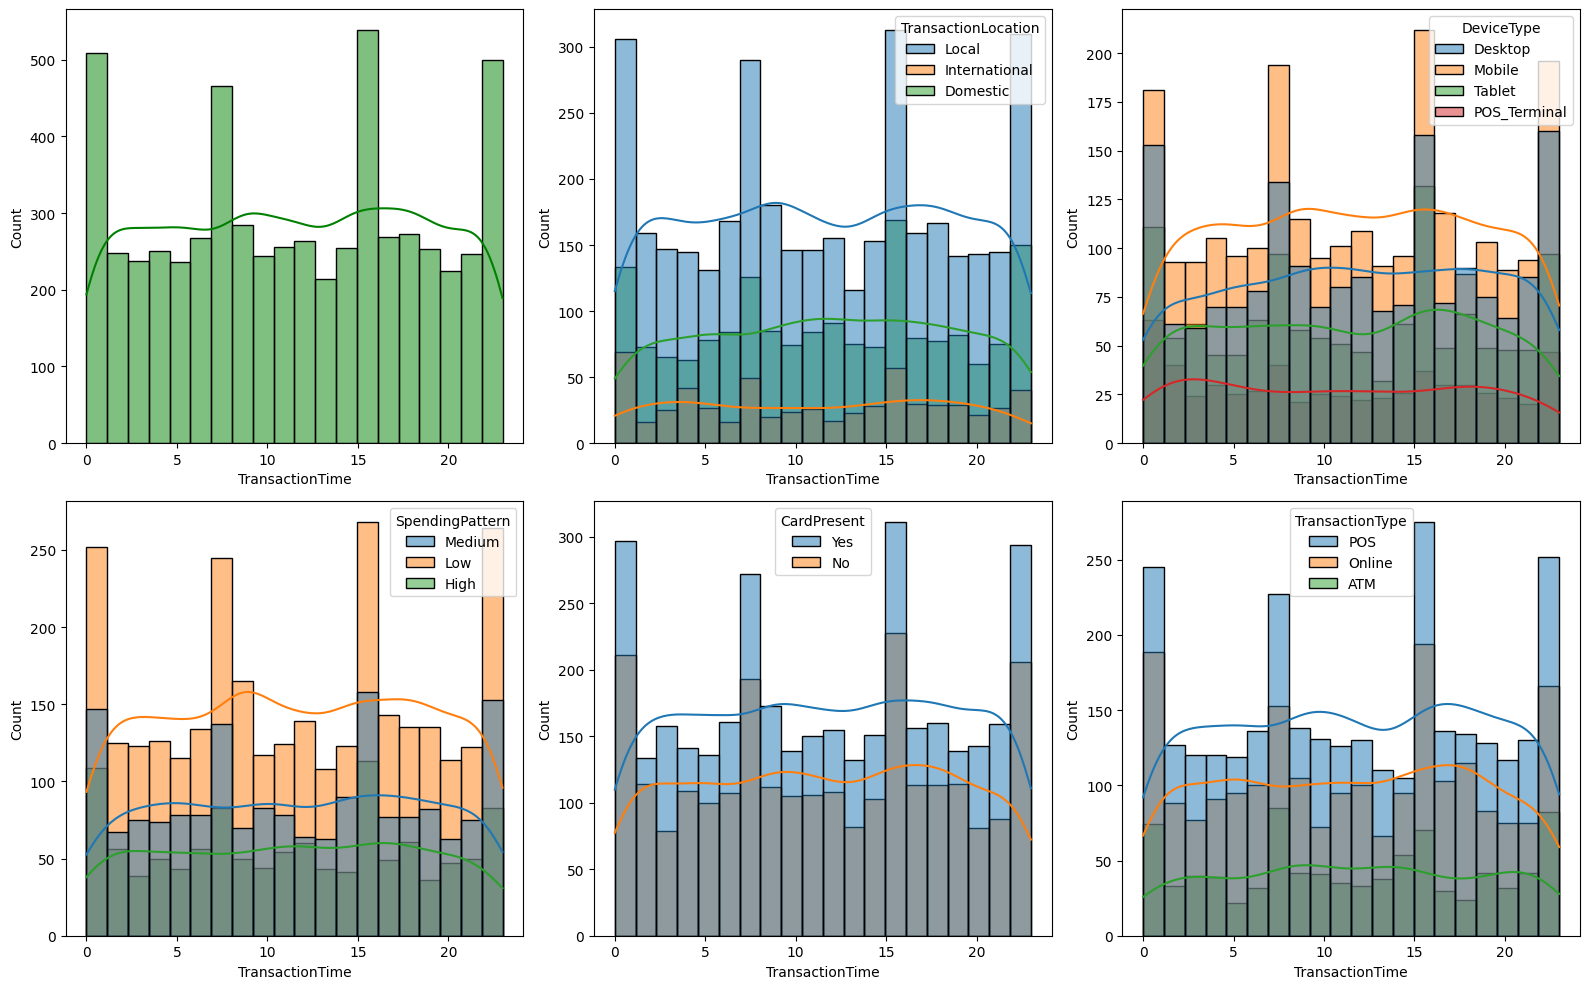

In [122]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

sns.histplot(df['TransactionTime'], kde=True, color="g", ax=axes[0,0])
sns.histplot(data=df, x='TransactionTime', kde=True, hue='TransactionLocation', ax=axes[0,1])
sns.histplot(data=df, x='TransactionTime', kde=True, hue='DeviceType', ax=axes[0,2])

sns.histplot(data=df, x='TransactionTime', kde=True, hue='SpendingPattern', ax=axes[1,0])
sns.histplot(data=df, x='TransactionTime', kde=True, hue='CardPresent', ax=axes[1,1])
sns.histplot(data=df, x='TransactionTime', kde=True, hue='TransactionType', ax=axes[1,2])

plt.tight_layout()
plt.show()

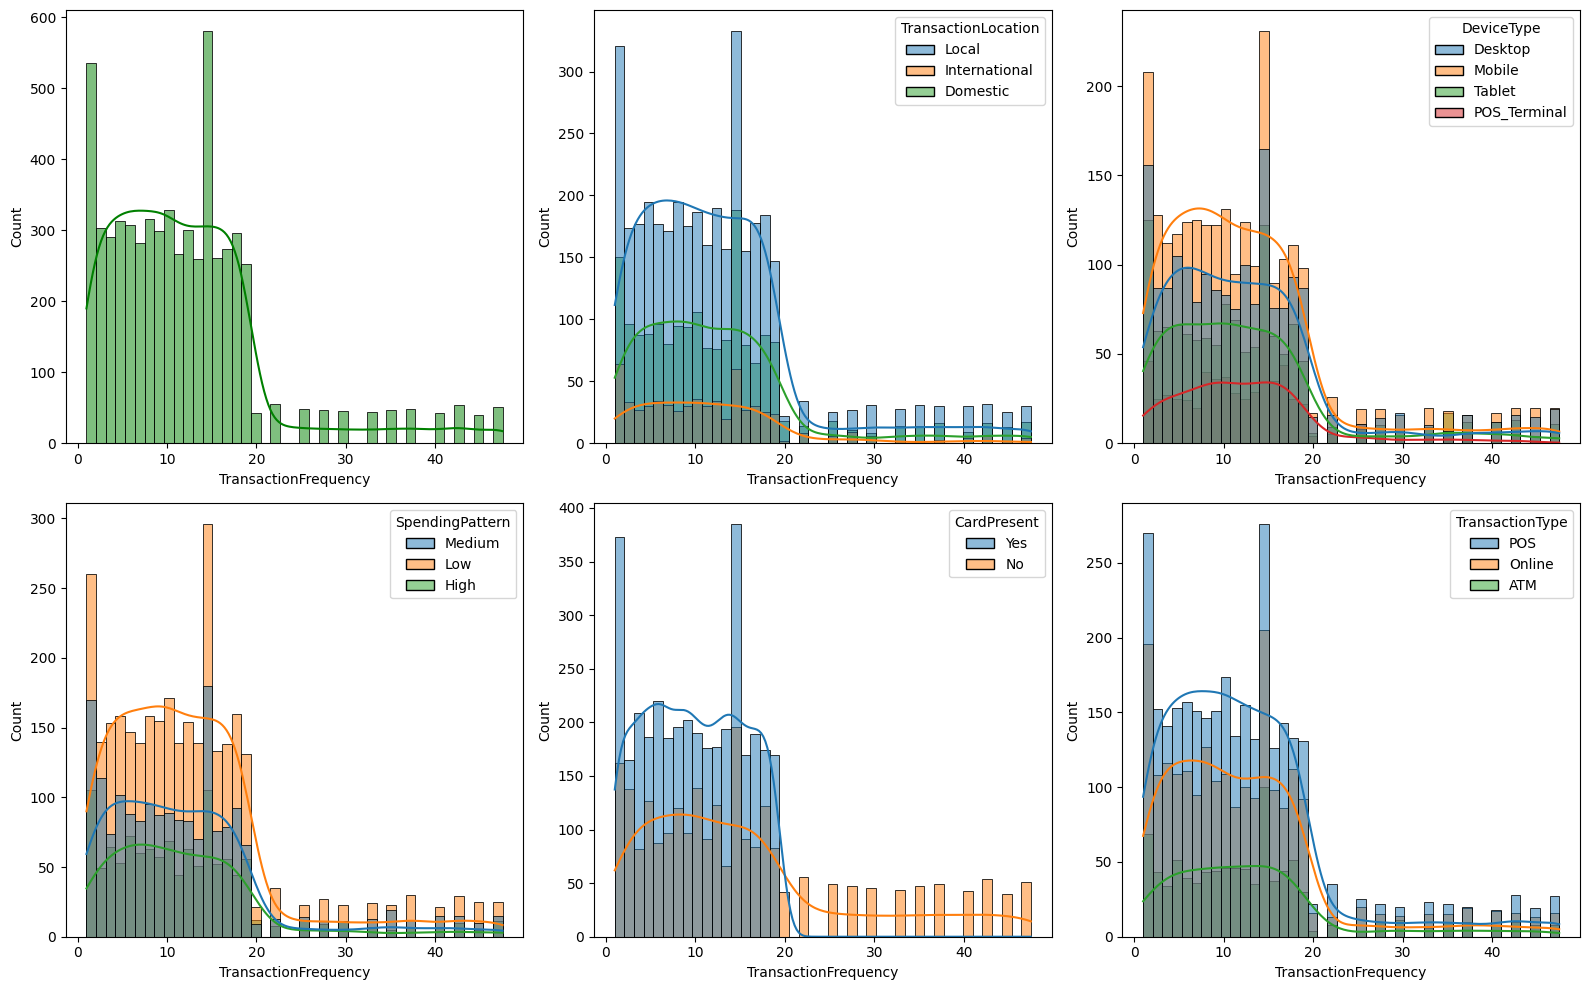

In [123]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

sns.histplot(df['TransactionFrequency'], kde=True, color="g", ax=axes[0,0])
sns.histplot(data=df, x='TransactionFrequency', kde=True, hue='TransactionLocation', ax=axes[0,1])
sns.histplot(data=df, x='TransactionFrequency', kde=True, hue='DeviceType', ax=axes[0,2])

sns.histplot(data=df, x='TransactionFrequency', kde=True, hue='SpendingPattern', ax=axes[1,0])
sns.histplot(data=df, x='TransactionFrequency', kde=True, hue='CardPresent', ax=axes[1,1])
sns.histplot(data=df, x='TransactionFrequency', kde=True, hue='TransactionType', ax=axes[1,2])

plt.tight_layout()
plt.show()

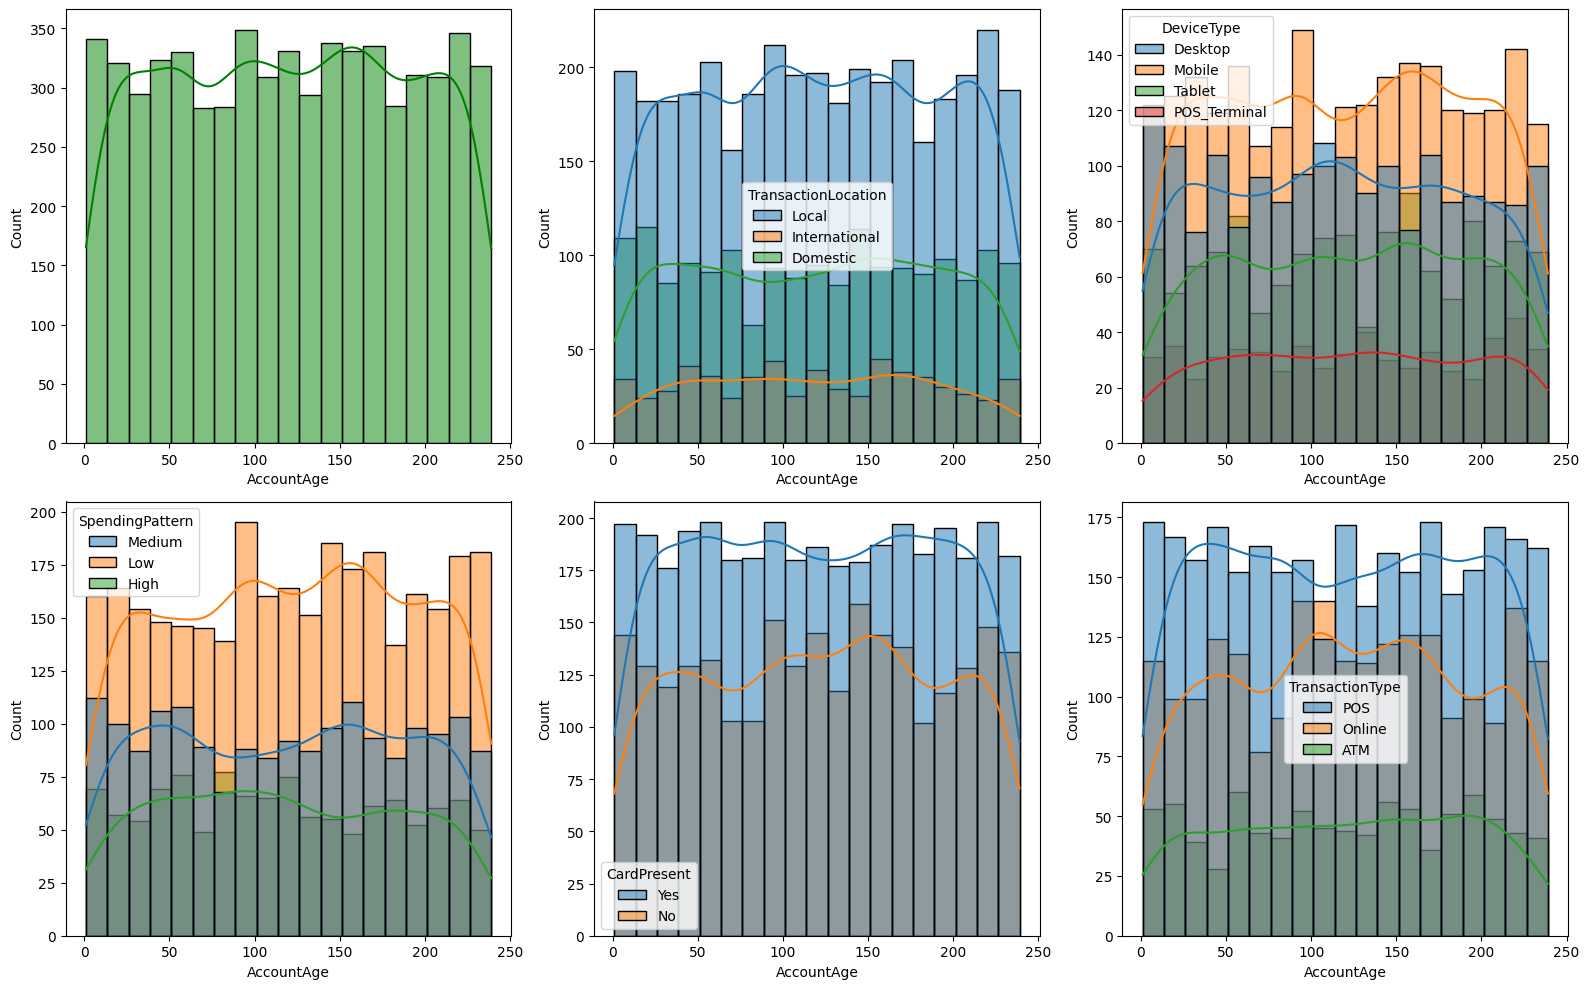

In [125]:
fig, axes = plt.subplots(2,3, figsize=(16,10))

sns.histplot(df['AccountAge'], kde=True, color="g", ax=axes[0,0])
sns.histplot(data=df, x='AccountAge', kde=True, hue='TransactionLocation', ax=axes[0,1])
sns.histplot(data=df, x='AccountAge', kde=True, hue='DeviceType', ax=axes[0,2])

sns.histplot(data=df, x='AccountAge', kde=True, hue='SpendingPattern', ax=axes[1,0])
sns.histplot(data=df, x='AccountAge', kde=True, hue='CardPresent', ax=axes[1,1])
sns.histplot(data=df, x='AccountAge', kde=True, hue='TransactionType', ax=axes[1,2])

plt.tight_layout()
plt.show()

<Axes: ylabel='AccountAge'>

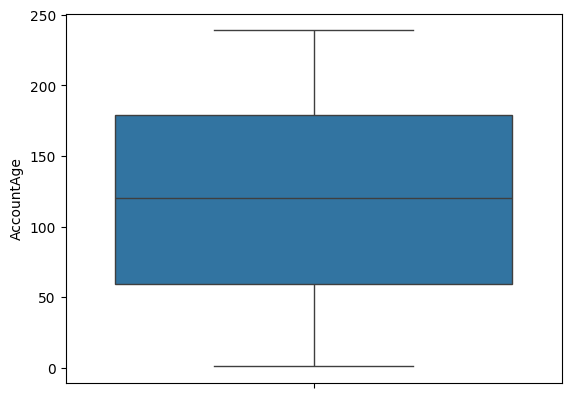

In [124]:
sns.boxplot(df['AccountAge'])

<Axes: ylabel='TransactionTime'>

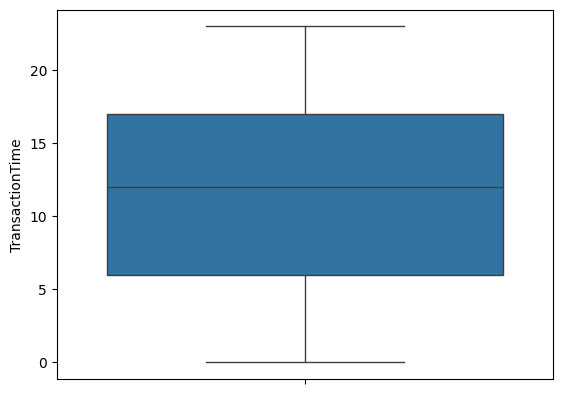

In [128]:
sns.boxplot(df['TransactionTime'])

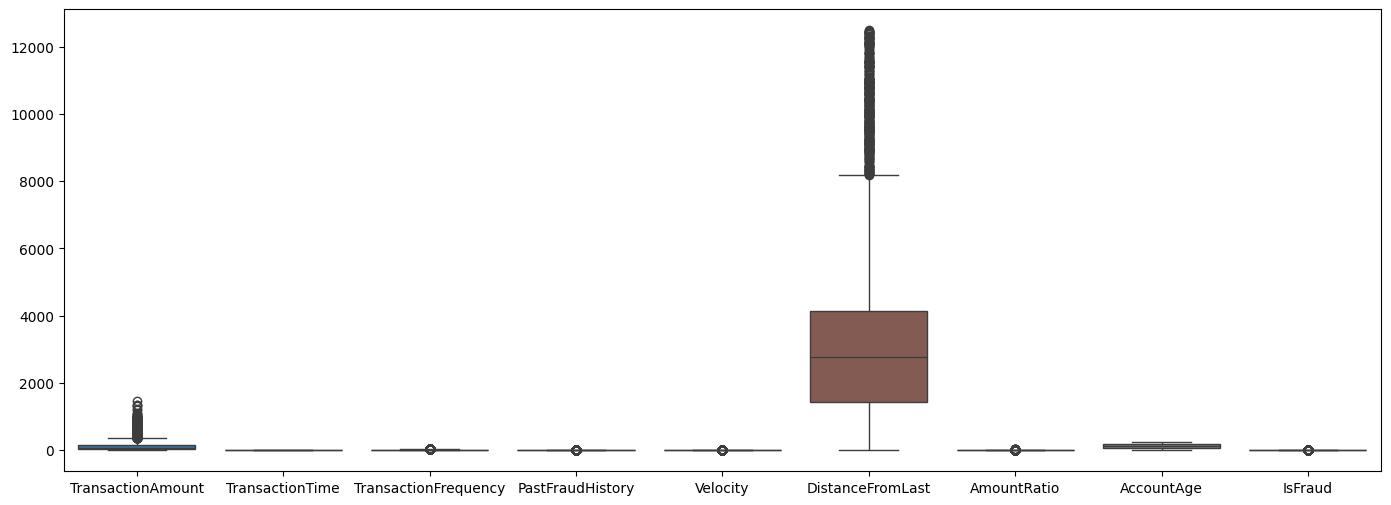

In [135]:
plt.figure(figsize=(17,6))
sns.boxplot(df)
plt.show()

<Axes: xlabel='TransactionTime', ylabel='TransactionAmount'>

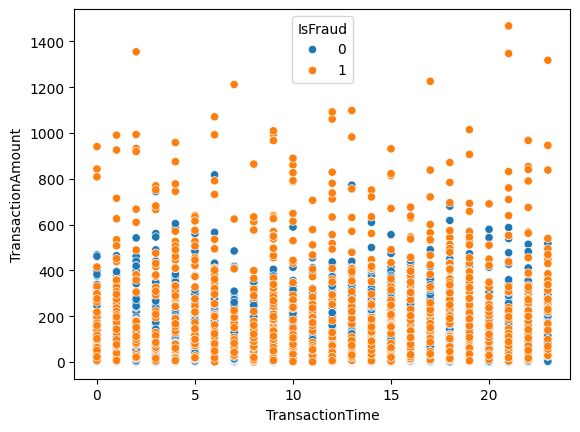

In [137]:
sns.scatterplot(x='TransactionTime',y='TransactionAmount',hue='IsFraud',data=df)

<Axes: xlabel='AccountAge', ylabel='TransactionAmount'>

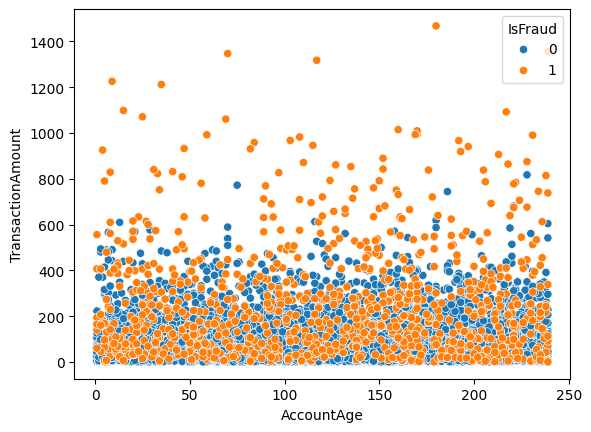

In [138]:
sns.scatterplot(x='AccountAge',y='TransactionAmount',hue='IsFraud',data=df)

<Axes: xlabel='AmountRatio', ylabel='TransactionAmount'>

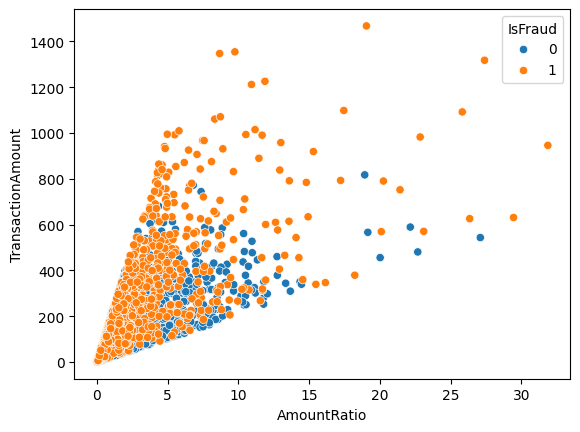

In [140]:
sns.scatterplot(x='AmountRatio',y='TransactionAmount',hue='IsFraud',data=df)

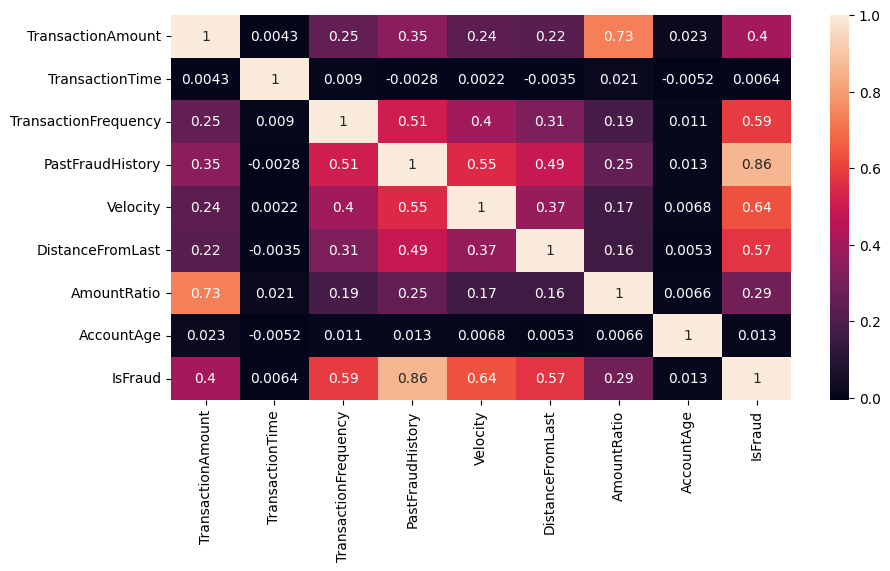

In [149]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numeric_features].corr(),annot=True)
plt.show()

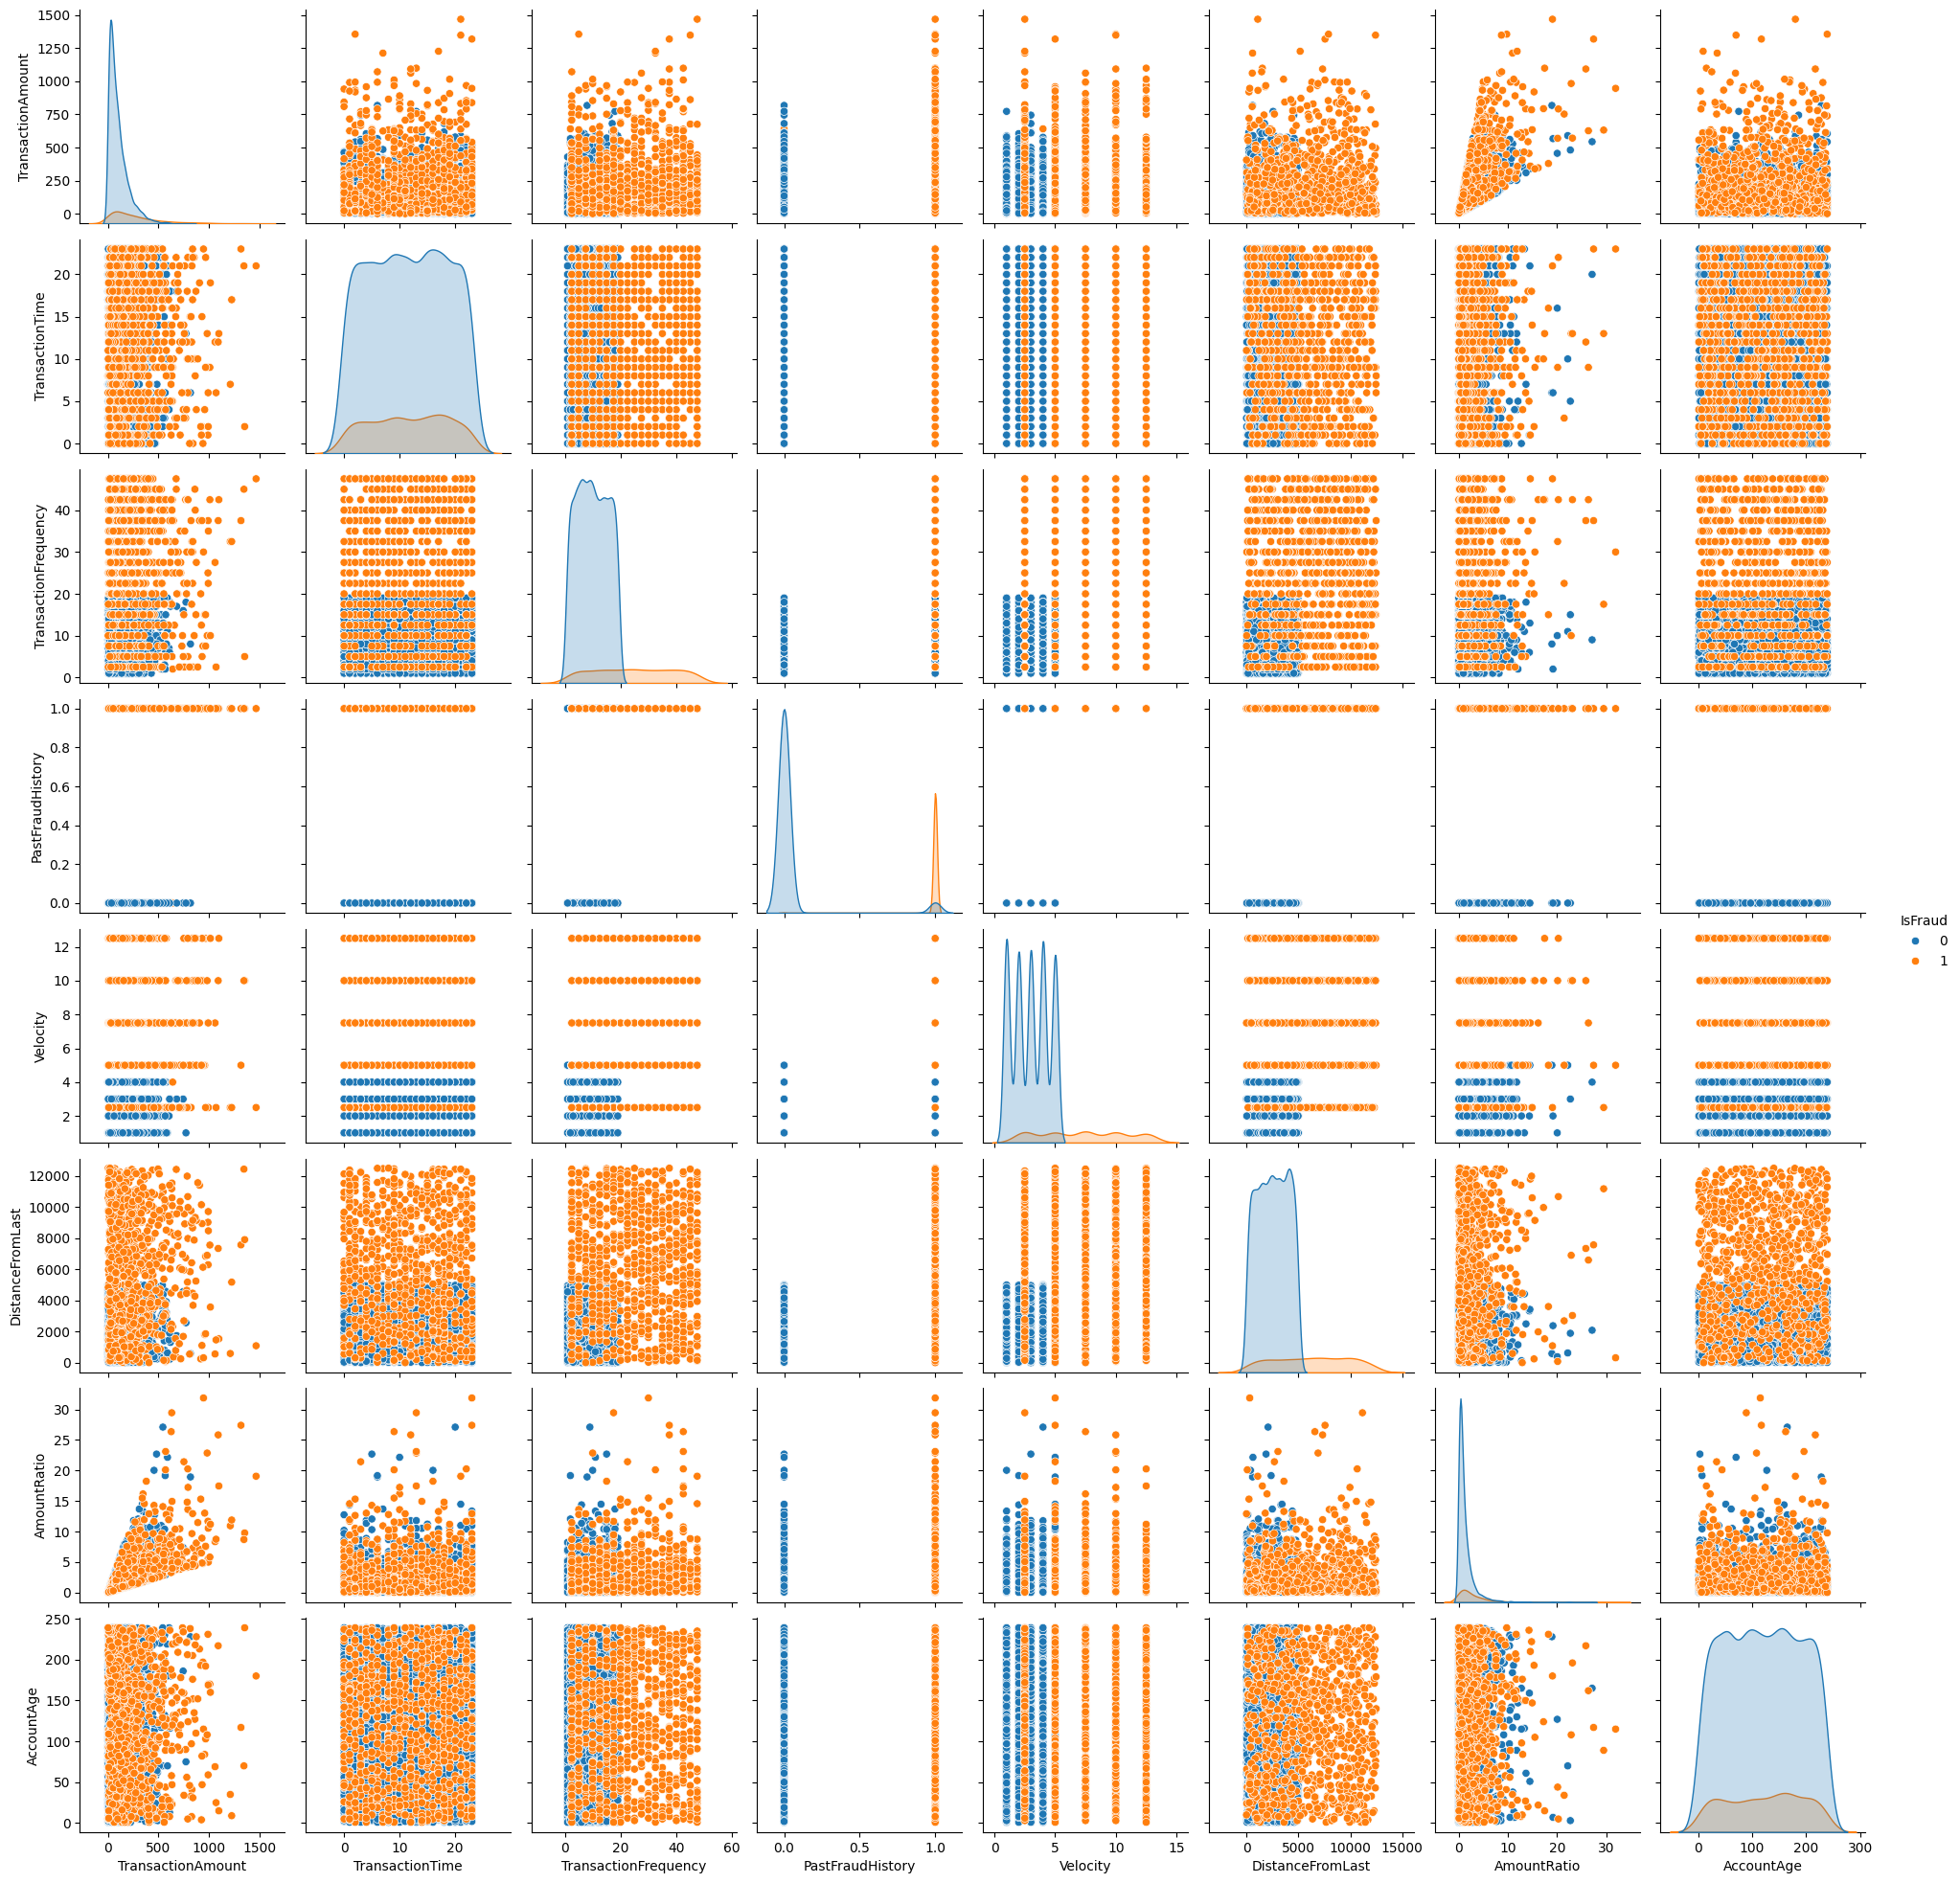

In [151]:
sns.pairplot(df,hue='IsFraud')